<Axes: xlabel='x', ylabel='y'>

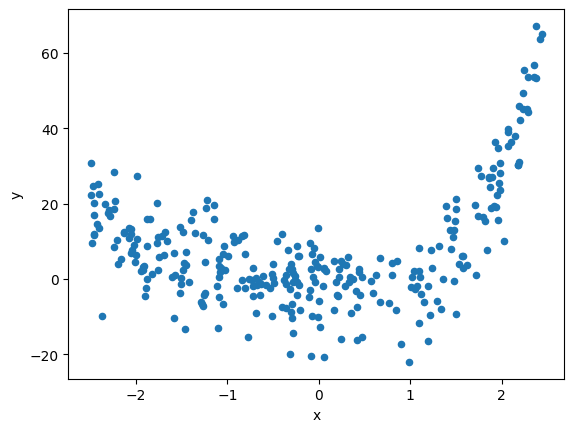

In [1]:
import pandas as pd
import numpy as np
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

In [2]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df[['x']], df['y'], test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))


240
60


In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

mse_lg_train = mean_squared_error(y_train, y_train_pred)
mse_lg_test = mean_squared_error(y_test, y_test_pred)

print(mse_lg_train, mse_lg_test)

198.4334716257228 259.20060215089063


In [4]:
from sklearn.neighbors import KNeighborsRegressor
knn_3_reg = KNeighborsRegressor(n_neighbors=3)
knn_3_reg.fit(X_train, y_train)

y_train_pred = knn_3_reg.predict(X_train)
y_test_pred = knn_3_reg.predict(X_test)

knn_3_reg_train = mean_squared_error(y_train, y_train_pred)
knn_3_reg_test = mean_squared_error(y_test, y_test_pred)

print(knn_3_reg_train, knn_3_reg_test)


35.149539770264475 91.1149245001611


In [5]:
knn_5_reg = KNeighborsRegressor(n_neighbors=5)
knn_5_reg.fit(X_train, y_train)


y_train_pred = knn_5_reg.predict(X_train)
y_test_pred = knn_5_reg.predict(X_test)

knn_5_reg_train = mean_squared_error(y_train, y_train_pred)
knn_5_reg_test = mean_squared_error(y_test, y_test_pred)

print(knn_5_reg_train, knn_5_reg_test)

42.03714674103853 88.91477571310598


In [6]:
print(knn_3_reg, knn_5_reg)

KNeighborsRegressor(n_neighbors=3) KNeighborsRegressor()


In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly_2_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_2_features.fit_transform(X_train)
X_test_poly = poly_2_features.fit_transform(X_test)

poly2_lin_reg = LinearRegression()
poly2_lin_reg.fit(X_train_poly, y_train)

y_train_pred = poly2_lin_reg.predict(X_train_poly)
y_test_pred = poly2_lin_reg.predict(X_test_poly)

poly_2_features_train = mean_squared_error(y_train, y_train_pred)
poly_2_features_test = mean_squared_error(y_test, y_test_pred)

print(poly_2_features_train, poly_2_features_test)

81.2205377259435 114.89878856634768


In [8]:
poly_3_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_3_features.fit_transform(X_train)
X_test_poly = poly_3_features.fit_transform(X_test)

poly3_lin_reg = LinearRegression()
poly3_lin_reg.fit(X_train_poly, y_train)

y_train_pred = poly3_lin_reg.predict(X_train_poly)
y_test_pred = poly3_lin_reg.predict(X_test_poly)

poly_3_features_train = mean_squared_error(y_train, y_train_pred)
poly_3_features_test = mean_squared_error(y_test, y_test_pred)

print(poly_3_features_train, poly_3_features_test)

61.18930333112707 88.52548447709032


In [9]:
poly_4_features = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly_4_features.fit_transform(X_train)
X_test_poly = poly_4_features.fit_transform(X_test)

poly4_lin_reg = LinearRegression()
poly4_lin_reg.fit(X_train_poly, y_train)

y_train_pred = poly4_lin_reg.predict(X_train_poly)
y_test_pred = poly4_lin_reg.predict(X_test_poly)

poly_4_features_train = mean_squared_error(y_train, y_train_pred)
poly_4_features_test = mean_squared_error(y_test, y_test_pred)

print(poly_4_features_train, poly_4_features_test)

53.04072902847133 75.52380419926506


In [10]:
poly_5_features = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly_5_features.fit_transform(X_train)
X_test_poly = poly_5_features.fit_transform(X_test)

poly5_lin_reg = LinearRegression()
poly5_lin_reg.fit(X_train_poly, y_train)

y_train_pred = poly5_lin_reg.predict(X_train_poly)
y_test_pred = poly5_lin_reg.predict(X_test_poly)

poly_5_features_train = mean_squared_error(y_train, y_train_pred)
poly_5_features_test = mean_squared_error(y_test, y_test_pred)

print(poly_5_features_train, poly_5_features_test)

53.00639852325722 75.96174344888746


In [11]:
data = {
    "train_mse": [mse_lg_train, knn_3_reg_train, knn_5_reg_train, poly_2_features_train, poly_3_features_train, poly_4_features_train, poly_5_features_train],
    "test_mse": [mse_lg_test, knn_3_reg_test, knn_5_reg_test, poly_2_features_test, poly_3_features_test, poly_4_features_test, poly_5_features_test]
}

df = pd.DataFrame(data, index = ["lin_reg", "knn_3_reg", "knn_5_reg", "poly_2_reg", "poly_3_reg", "poly_4_reg", "poly_5_reg" ])
df

,train_mse,test_mse
lin_reg,198.433472,259.200602
knn_3_reg,35.149540,91.114925
knn_5_reg,42.037147,88.914776
poly_2_reg,81.220538,114.898789
poly_3_reg,61.189303,88.525484
poly_4_reg,53.040729,75.523804
poly_5_reg,53.006399,75.961743


In [12]:
df.to_pickle('mse.pkl')

In [13]:
import pickle

reg = [
    (lin_reg, None),
    (knn_3_reg, None),
    (knn_5_reg, None),
    (poly2_lin_reg, poly_2_features),
    (poly3_lin_reg, poly_3_features),
    (poly4_lin_reg, poly_4_features),
    (poly5_lin_reg, poly_5_features),
]
print(reg)
with open('reg.pkl', 'wb') as f:
    pickle.dump(reg, f)
    


[(LinearRegression(), None), (KNeighborsRegressor(n_neighbors=3), None), (KNeighborsRegressor(), None), (LinearRegression(), PolynomialFeatures(include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=3, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=4, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))]
